In [126]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns
import scipy.io as scio

In [127]:
def get_active_cells(deconvolved_traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(deconvolved_traces.keys())

    for cell in deconvolved_traces:
        if deconvolved_traces[cell]['active'] == True:
            d[cell] = deconvolved_traces[cell]
        else:
            d.pop(cell,None)

    return d

In [128]:
# Import data

data = 'F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID488/psilo/TSeries-10132023-1324-150/suite2p/plane0/cells.pkl'

conditions_mat = scio.loadmat('F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID488/psilo/TSeries-10132023-1324-150/suite2p/plane0/ID488_23102023_2.mat') # conditition type of each trial in chronological order (row 1 = trial 1)
conditions = conditions_mat["stim_data"]


with open(data, 'rb') as f:
    data = pickle.load(f)


INPUT_DESIRED_CELL = 20

In [129]:
print(len(conditions))
count = np.count_nonzero(conditions==12335)
print(count)

410
300


In [130]:
cell_ID = data[INPUT_DESIRED_CELL]
cell = cell_ID['traces']
nfreq = list(cell_ID['traces'].keys())  # Which sound frequencies were presented (Hz)?
nInt = list(cell_ID['traces'][nfreq[0]].keys()) # What intensities were presented (dB)?
ntrial = list(cell_ID['traces'][nfreq[5]][nInt[0]].keys()) # How many trials for each condition? 
print("Conditions:",nfreq, nInt, ntrial)

Conditions: [4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [65] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,

In [131]:
data_active = get_active_cells(data)

In [132]:
matrix_all = []
matrix_peak = []

for key in data_active.keys():
    cell_ID = data[key]
    cell = cell_ID['traces']
    nfreq = list(cell_ID['traces'].keys())
    nInt = list(cell_ID['traces'][nfreq[0]].keys())
    ntrial_large = list(cell_ID['traces'][nfreq[5]][nInt[0]].keys())  # Use the condition with more trials

    # Find the maximum number of trials across all conditions
    max_trials_large = len(cell[nfreq[5]][nInt[0]][ntrial_large[0]])

    # Initialize the array with NaN values
    matrix = np.full((len(nfreq), len(nInt), len(ntrial_large), max_trials_large), np.nan)

    # Fill the matrix with data
    for i, freq in enumerate(nfreq):
        for j, intensity in enumerate(nInt):
            for k, trial in enumerate(ntrial_large):
                try:
                    trial_data = cell[freq][intensity][trial]
                    matrix[i, j, k, :len(trial_data)] = trial_data
                except KeyError:
                    pass

    # Normalize the matrix by computing a global baseline from pre-stimulus frames and subtracting from response frames.
                
    single_baseline = np.mean(matrix[:,:,:5])

    matrix = matrix - single_baseline



    matrix_all.append(matrix)  
    matrix_peak.append(peak_values)              

# Remove the singleton dimension
matrix_all = np.squeeze(matrix_all, axis=2)


print("The shape of this matrix is:", matrix_all.shape)



NameError: name 'peak_values' is not defined

In [ ]:
plt.plot(matrix_all[1,5,51,:])

TypeError: list indices must be integers or slices, not tuple

In [ ]:
cell_ID = data[INPUT_DESIRED_CELL]
cell = cell_ID['deconvolved_traces']

ntrial_fam = list(cell_ID['deconvolved_traces'][nfreq[5]][nInt[0]].keys()) # How many trials of the familiar condition? 
ntrial_rand = list(cell_ID['deconvolved_traces'][nfreq[0]][nInt[0]].keys()) # How many trials of the unfamiliar condition? 

In [ ]:
# Extract all the responses to the familiar stim. 

matrix_fam = np.array([cell[12335][65][i] for i in ntrial_fam])
print(matrix_fam.shape)

single_baseline = np.mean(matrix_fam[:,:5])

normalized_fam = matrix_fam - single_baseline
print(normalized_fam)
# Create a matrix containing the peak response value for each trial. 
peak_matrix = np.max(normalized_fam,axis=1)
print(peak_matrix.shape)




(300, 15)
[[-3.63203193 -3.63203193 -3.63203193 ... -3.63203193 -3.63203193
  -3.63203193]
 [-3.63203193 -3.63203193 -3.63203193 ...  8.96158837 -3.63203193
  -3.63203193]
 [-3.63203193 -3.63203193 -3.63203193 ... -3.63203193 -3.63203193
  -3.63203193]
 ...
 [-3.63203193 -3.63203193 -1.12722994 ... -3.63203193 -3.63203193
  20.12210511]
 [14.00716637 21.09631585 59.0221238  ... 63.8333001   5.98704194
  10.47221326]
 [56.11814355  0.32106875 -3.63203193 ... -3.63203193 -3.63203193
  -3.63203193]]
(300,)


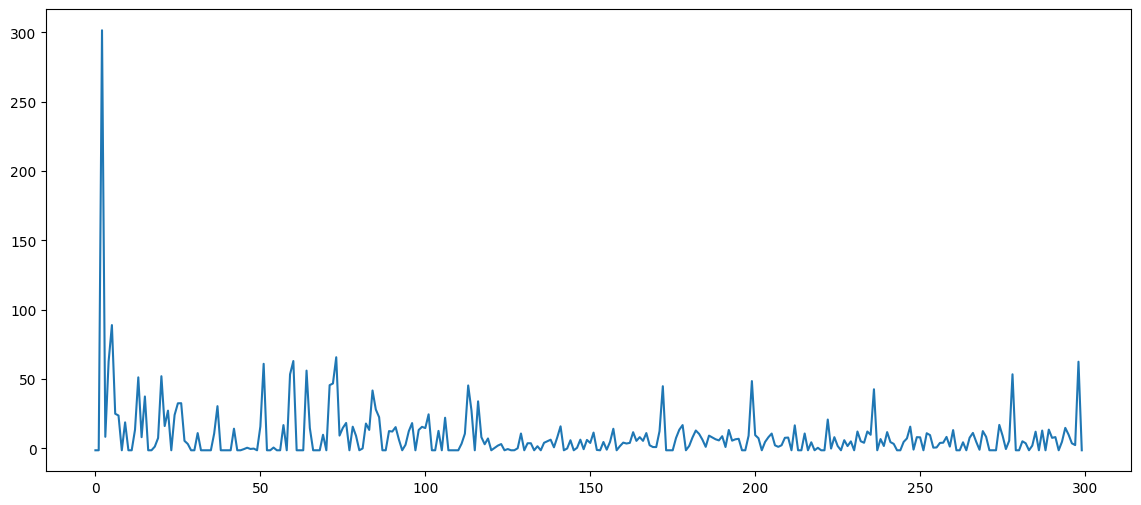

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(peak_matrix.T)

300
300


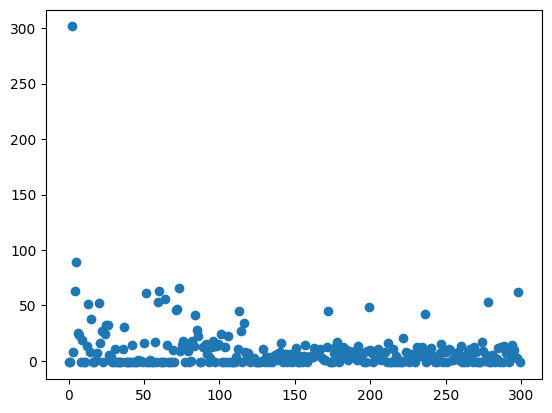

In [ ]:
indices = np.arange(len(peak_matrix))
print(len(indices))
print(len(peak_matrix))

plt.scatter(indices, peak_matrix)
plt.show()

In [133]:
# get the max matrix for the whole population
matrix_fam_all_cells = []
peak_matrix_all_cells = []

for key in data.keys():
    cell_ID = data[key]
    cell = cell_ID['deconvolved_traces']
    ntrial_fam = list(cell_ID['deconvolved_traces'][nfreq[5]][nInt[0]].keys()) # How many trials of the familiar condition? 
    matrix_fam = np.array([cell[12335][65][i] for i in ntrial_fam])
    single_baseline = np.mean(matrix_fam[:,:5])
    normalized_fam = matrix_fam - single_baseline
    matrix_fam_all_cells.append(normalized_fam)
    peak_matrix = np.max(normalized_fam[5:])
    peak_matrix_all_cells.append(peak_matrix)
matrix_fam_all_cells = np.array(matrix_fam_all_cells)
peak_matrix_all_cells = np.array(peak_matrix_all_cells)

print(matrix_fam_all_cells.shape)
print(peak_matrix_all_cells.shape)


    



(502, 300, 15)
(502,)


In [134]:

max_to_normalize = np.max(peak_matrix_all_cells,axis=1)
print(max_to_normalize.shape)

max_values_reshaped = max_to_normalize[:, np.newaxis]


normalized = peak_matrix_all_cells / max_values_reshaped
print(normalized.shape)

AxisError: axis 1 is out of bounds for array of dimension 1

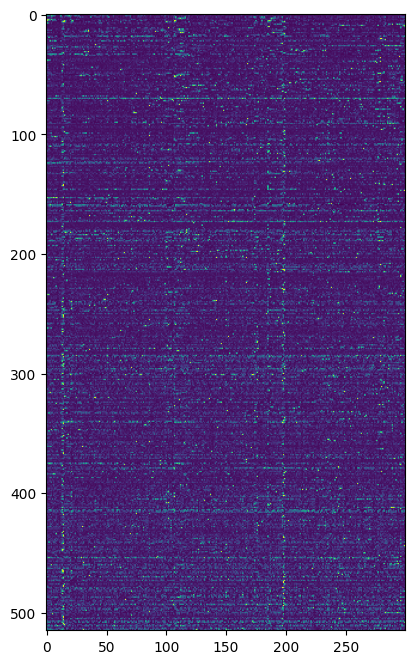

In [ ]:
plt.figure(figsize=(8, 8)) 
plt.imshow(normalized)


In [135]:
data_active = get_active_cells(data)

# get the max matrix for the whole population
matrix_fam_active_cells = []
peak_matrix_active_cells = []
binary_matrix_active_cells = []

for key in data_active.keys():
    cell_ID = data_active[key]
    cell = cell_ID['traces']
    ntrial_fam = list(cell_ID['traces'][nfreq[5]][nInt[0]].keys()) # How many trials of the familiar condition? 
    matrix_fam = np.array([cell[12335][65][i] for i in ntrial_fam])
    single_baseline = np.mean(matrix_fam[:,:5])
    normalized_fam = matrix_fam - single_baseline
    response_period = normalized_fam[:,5:]
    matrix_fam_active_cells.append(normalized_fam)
    peak_matrix = np.max(response_period,axis=1)
    binary_threshold = single_baseline + 2 * np.std(matrix_fam[:,:5]) # threshold is more than 4SD's above baseline.
    binary_matrix = (peak_matrix > binary_threshold).astype(int)
    binary_matrix_active_cells.append(binary_matrix)
    peak_matrix_active_cells.append(peak_matrix)

matrix_fam_active_cells = np.array(matrix_fam_active_cells)
peak_matrix_active_cells = np.array(peak_matrix_active_cells)
binary_matrix_active_cells = np.array(binary_matrix_active_cells)

print(matrix_fam_active_cells.shape)
print(peak_matrix_active_cells.shape)
print(binary_matrix_active_cells.shape)

(161, 300, 15)
(161, 300)
(161, 300)


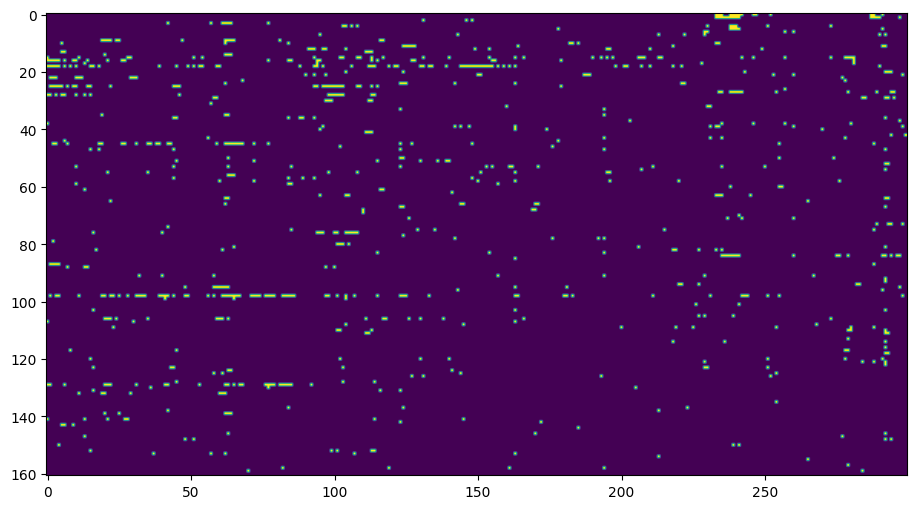

In [136]:
plt.figure(figsize=(12, 6))
plt.imshow(binary_matrix_active_cells)

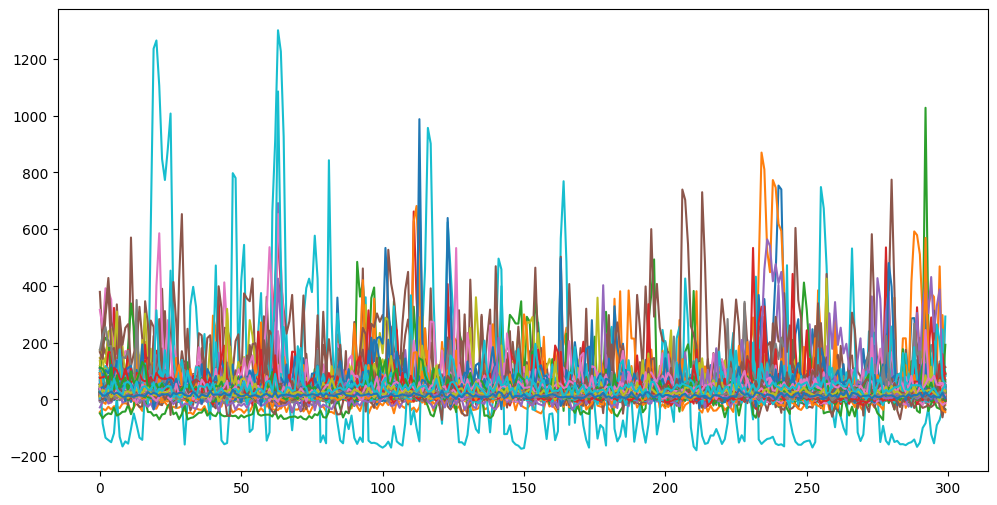

In [ ]:
# Calculate a response reliability? 
plt.figure(figsize=(12,6))
plt.plot(peak_matrix_active_cells.T)

In [ ]:
# Normalize each value so that it's peak value is 1. 

print(peak_matrix_active_cells.shape)

max_to_normalize = np.mean(peak_matrix_active_cells,axis=1)
print(max_to_normalize.shape)

max_values_reshaped = max_to_normalize[:, np.newaxis]


normalized = peak_matrix_active_cells / max_values_reshaped
print(normalized.shape)

(161, 300)
(161,)
(161, 300)


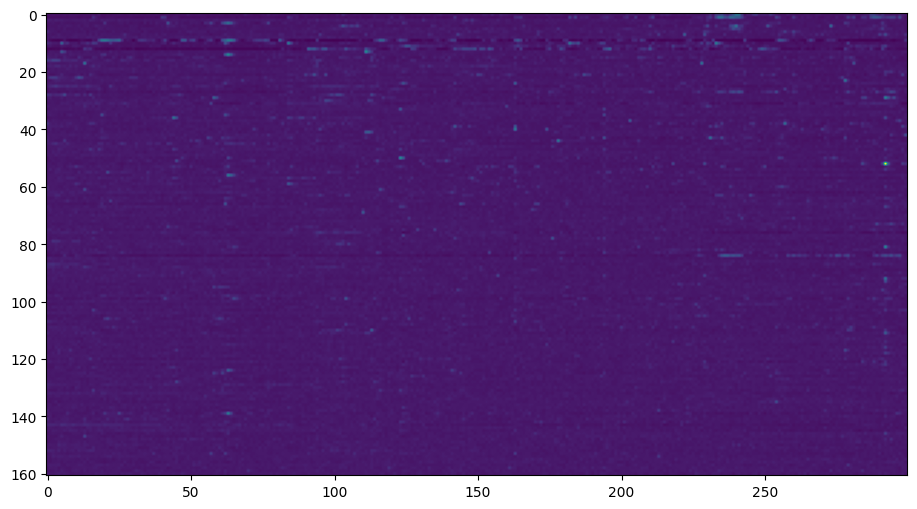

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(normalized)

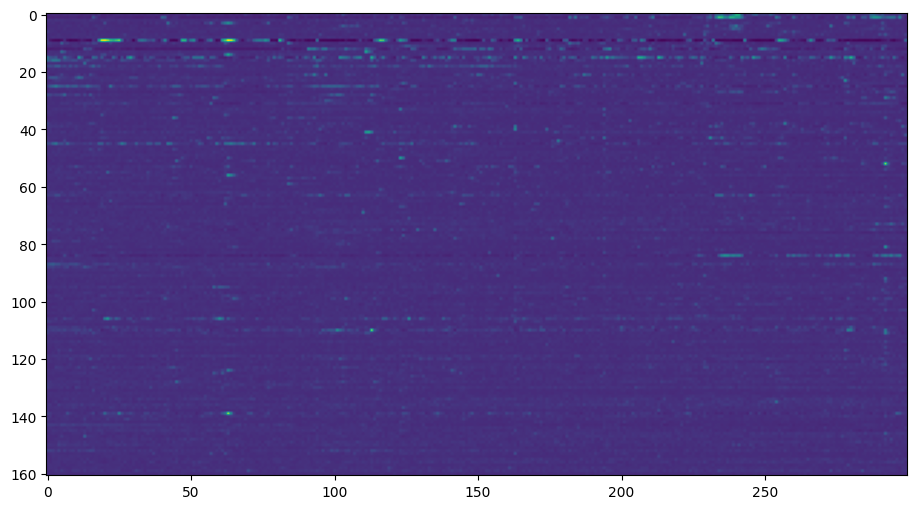

In [ ]:
# Need to look at amplitudes of the novel stim vs the familiar stim.  

plt.figure(figsize=(12, 6))
plt.imshow(peak_matrix_active_cells)


In [ ]:
# What I want to measure:

# I want to look at the amplitudes of responses before and after psilocybin/saline administration.
# There are so many responses, i'm not sure how to plot response amplitudes for the whole population.

# I want to use the adaptation cohort to look at how the response amplitude of cells differs between familiar and unfamiliar stimuli.
# Potential issues because lots of cells won't be sensitive to certain unfamiliar stimuli.

